# Proyecto Final - Física Computacional

## Ecuación de calor en dos dimensiones

La ecuación de calor es una ecuación diferencial en derivadas parciales (PDE) que describe cómo se distribuye la temperatura $u(x,y,t)$ en una región bidimensional del espacio $(x,y)$ con respecto al tiempo $t$. En su forma ideal, esta ecuación modela la transferencia de calor bajo condiciones simplificadas: sin fuentes externas (energía), capacidad calórica uniforme y aislamiento perfecto en los bordes.

La forma general de la ecuación es la siguiente:

$$
\frac{∂u}{∂t}=c^{2}[\frac{∂^{2}u}{∂x^{2}}+\frac{∂^{2}u}{∂y^{2}}] 
$$

donde:

* $u(x,y,t)$ es la temperatura en un punto del plano $(x,y)$ en un instante $t$.
* $c$ es la constante térmica del medio.
* $\frac{∂u}{∂t}$ es el cambio de temperatura respecto al tiempo.
* $\frac{∂^{2}u}{∂x^{2}}$ y $\frac{∂^{2}u}{∂y^{2}}$ son derivadas parciales que representan la difusión de calor en $x$ e $y$ respectivamente.

Para este proyecto, se trabaja en una región acotada $x ∈ [0,a]$ y $y ∈ [0,b]$ con condiciones de frontera variables. La dinámica del sistema está determinada por estas condiciones de frontera y por las condiciones iniciales.

## Discretización

Es necesario discretizar para poder trabajar con funciones continuas, ya que las computadoras no pueden manipular este tipo de funciones directamente. Para esto se trabaja con valores numéricos en puntos discretos dentro de una malla o rejilla con un número finito de puntos uniformemente espaciados (h). 

En el estado estacionario $\frac{∂u}{∂t}=0$, entonces, se discretizan las derivadas parciales de $x$ y $y$ utilizando **diferencias finitas**:

$$
 0=\frac{∂^{2}u}{∂x^{2}}+\frac{∂^{2}u}{∂y^{2}}
$$


Para $\frac{∂^{2}u}{∂x^{2}}$:

$$
\frac{∂^{2}u}{∂x^{2}} \approx \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h^{2}}
$$



Para $\frac{∂^{2}u}{∂y^{2}}$:

$$
\frac{∂^{2}u}{∂y^{2}} \approx \frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{h^{2}}
$$


Desarrollando ambas expresiones en el estado estacionario:

$$
\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h^{2}} + \frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{h^{2}} = 0
$$

$$
u_{i+1,j}-4u_{i,j}+u_{i-1,j} + u_{i,j+1}+u_{i,j-1} = 0
$$

Finalmente se llega a la siguiente expresión:

$$
u_{i,j} = \frac{1}{4} (u_{i+1,j}+u_{i-1,j} + u_{i,j+1}+u_{i,j-1})
$$

donde $u_{i,j} = \phi_{i,j}$ representa la temperatura en el punto $(i,j)$ de la rejilla o malla.

## Método de Gauss-Seidel

El método de Gauss-Seidel se utiliza para resolver problemas de disfretización de ecuaciones diferenciales como la ecuación de calor. Este método actualiza los valores de $\phi$ en los mismos espacios de memoria para cada iteración. Esto reduce significativamente el tiempo computacional, ya que el número de iteraciones necesarias para alcanzar la convergencia tiende a ser menor.

$$
\phi_{i,j} \leftarrow \frac{\phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1}}{4} 
$$

Para reducir el numero de iteraciones se agrega un parámetro de relajación $\omega$ (Guass-Seidel modificado):

$$
\phi_{i,j} = (1 + \omega) \dot [\frac{\phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1}}{4}] - (\omega \phi_{i,j})
$$


### Código python y gráfico generado

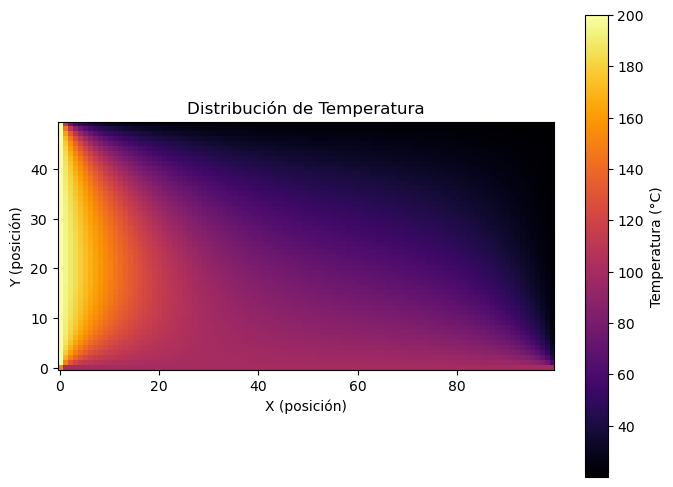

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función para analizar la evolución temporal de una placa
def temperaturas(temp_sup, temp_lat, temp_init, ancho, alto, omega, frames):
    phi = np.zeros((ancho + 1, alto + 1), dtype=float) # Grilla bidimensional
    phi[:, :] = temp_init # Condición inicial en el interior del sistema
    phi[0, :] = temp_sup # Condición inicial en borde superior de grilla
    phi[:, 0] = temp_lat # Condición inicial en borde izquierdo de grilla
    phi[0, 0] = (temp_sup + temp_lat) / 2 # Condición inicial en la esquina
    phi_copy = phi.copy() # Para comparar el error con la nueva grilla

    delta = 1 # Tolerancia de precisión
    while delta > 1e-7:
        # Método Gauss Seidel para aproximar el cambio de T en el espacio con el tiempo
        for i in range(1, ancho):
            for j in range(1, alto):
                phi[i,j] = (1 + omega) * 0.25 * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) - omega * phi[i, j]
        delta = np.max(np.abs(phi - phi_copy))
        phi_copy = phi.copy() # Ponemos la nueva grilla como la antigua

    return phi[:-1, :-1]  # Devuelve el estado estacionario (excluye bordes extras)

# Parámetros de la simulación
ancho, alto = 50, 100
temp_sup, temp_lat, temp_init = 100, 200, 20
omega = 0  # Sin relajación
frames = 50

# Cálculo de la distribución estacionaria
heatmap = temperaturas(temp_sup, temp_lat, temp_init, ancho, alto, omega, frames)

# Graficar el resultado final
plt.figure(figsize=(8, 6))
plt.imshow(heatmap, cmap="inferno", origin="lower")
plt.colorbar(label="Temperatura (°C)")
plt.title("Distribución de Temperatura")
plt.xlabel("X (posición)")
plt.ylabel("Y (posición)")
plt.show()

### Segundo ejemplo - Gráfica 2

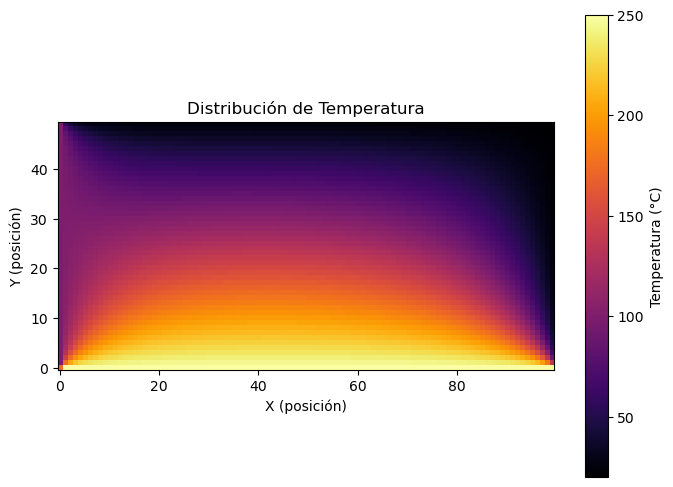

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función para analizar la evolución temporal de una placa
def temperaturas(temp_sup, temp_lat, temp_init, ancho, alto, omega, frames):
    phi = np.zeros((ancho + 1, alto + 1), dtype=float) # Grilla bidimensional
    phi[:, :] = temp_init # Condición inicial en el interior del sistema
    phi[0, :] = temp_sup # Condición inicial en borde superior de grilla
    phi[:, 0] = temp_lat # Condición inicial en borde izquierdo de grilla
    phi[0, 0] = (temp_sup + temp_lat) / 2 # Condición inicial en la esquina
    phi_copy = phi.copy() # Para comparar el error con la nueva grilla

    delta = 1 # Tolerancia de precisión
    while delta > 1e-7:
        # Método Gauss Seidel para aproximar el cambio de T en el espacio con el tiempo
        for i in range(1, ancho):
            for j in range(1, alto):
                phi[i,j] = (1 + omega) * 0.25 * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) - omega * phi[i, j]
        delta = np.max(np.abs(phi - phi_copy))
        phi_copy = phi.copy() # Ponemos la nueva grilla como la antigua

    return phi[:-1, :-1]  # Devuelve el estado estacionario (excluye bordes extras)

# Parámetros de la simulación
ancho, alto = 50, 100
temp_sup, temp_lat, temp_init = 250, 100, 20
omega = 0.5  # Sin relajación
frames = 50

# Cálculo de la distribución estacionaria
heatmap = temperaturas(temp_sup, temp_lat, temp_init, ancho, alto, omega, frames)

# Graficar el resultado final
plt.figure(figsize=(8, 6))
plt.imshow(heatmap, cmap="inferno", origin="lower")
plt.colorbar(label="Temperatura (°C)")
plt.title("Distribución de Temperatura")
plt.xlabel("X (posición)")
plt.ylabel("Y (posición)")
plt.show()

### Tercer ejemplo - Gráfica 3

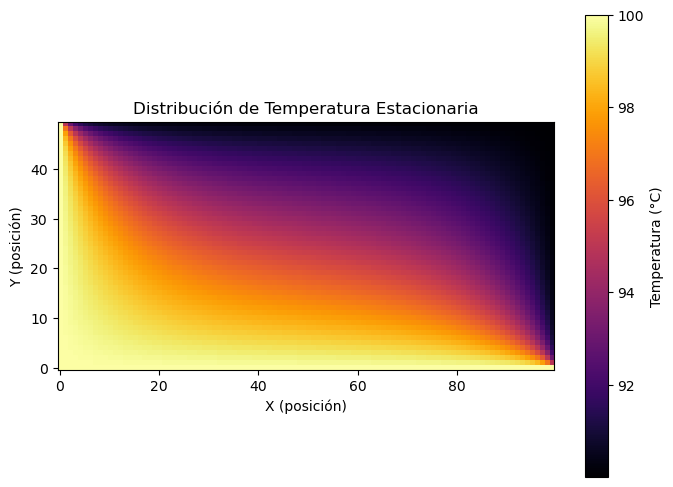

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Función para analizar la evolución temporal de una placa
def temperaturas(temp_sup, temp_lat, temp_init, ancho, alto, omega, frames):
    phi = np.zeros((ancho + 1, alto + 1), dtype=float) # Grilla bidimensional
    phi[:, :] = temp_init # Condición inicial en el interior del sistema
    phi[0, :] = temp_sup # Condición inicial en borde superior de grilla
    phi[:, 0] = temp_lat # Condición inicial en borde izquierdo de grilla
    phi[0, 0] = (temp_sup + temp_lat) / 2 # Condición inicial en la esquina
    phi_copy = phi.copy() # Para comparar el error con la nueva grilla

    delta = 1 # Tolerancia de precisión
    while delta > 1e-7:
        for i in range(1, ancho):
            for j in range(1, alto):
                phi[i,j] = (1 + omega) * 0.25 * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) - omega * phi[i, j]
        delta = np.max(np.abs(phi - phi_copy))
        phi_copy = phi.copy() # Ponemos la nueva grilla como la antigua

    return phi[:-1, :-1]  # Devuelve el estado estacionario (excluye bordes extras)

# Parámetros de la simulación
ancho, alto = 50, 100
temp_sup, temp_lat, temp_init = 100, 100, 90
omega = 0.5  # Sin relajación
frames = 50

# Cálculo de la distribución estacionaria
heatmap = temperaturas(temp_sup, temp_lat, temp_init, ancho, alto, omega, frames)

# Graficar el resultado final
plt.figure(figsize=(8, 6))
plt.imshow(heatmap, cmap="inferno", origin="lower")
plt.colorbar(label="Temperatura (°C)")
plt.title("Distribución de Temperatura Estacionaria")
plt.xlabel("X (posición)")
plt.ylabel("Y (posición)")
plt.show()

### Cuarto ejemplo - Gráfica 4

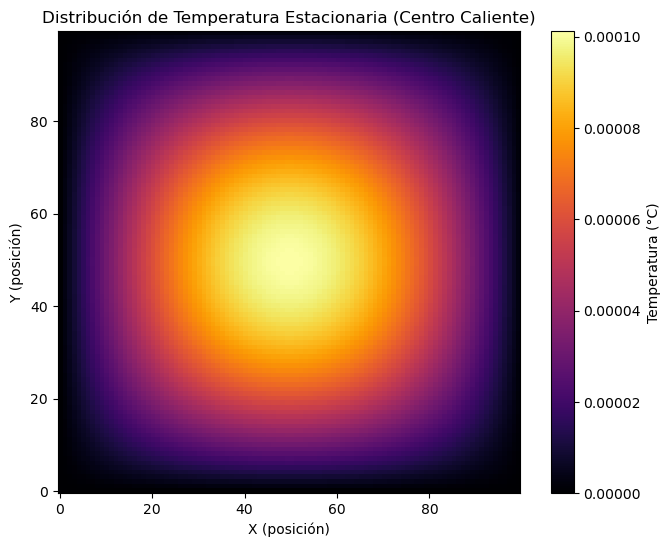

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Función para analizar la evolución temporal de una placa
def temperaturas_centro(temp_centro, temp_borde, ancho, alto, omega, frames):
    phi = np.zeros((ancho + 1, alto + 1), dtype=float)  # Grilla bidimensional
    phi[:, :] = temp_borde  # Condición inicial: borde frío
    centro_x, centro_y = ancho // 2, alto // 2
    radio = min(ancho, alto) // 10  # Tamaño del área caliente en el centro

    # Asignar temperatura alta en el centro
    for i in range(centro_x - radio, centro_x + radio):
        for j in range(centro_y - radio, centro_y + radio):
            if 0 <= i < ancho and 0 <= j < alto:
                phi[i, j] = temp_centro

    phi_copy = phi.copy()  # Para comparar el error con la nueva grilla

    delta = 1  # Tolerancia de precisión
    while delta > 1e-7:
        for i in range(1, ancho):
            for j in range(1, alto):
                phi[i, j] = (1 + omega) * 0.25 * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) - omega * phi[i, j]
        delta = np.max(np.abs(phi - phi_copy))
        phi_copy = phi.copy()  # Ponemos la nueva grilla como la antigua

    return phi[:-1, :-1]  # Devuelve el estado estacionario (excluye bordes extras)

# Parámetros de la simulación
ancho, alto = 100, 100
temp_centro, temp_borde = 50, 0  # Temperatura alta en el centro, baja en los bordes
omega = 0  # Sin relajación
frames = 50

# Cálculo de la distribución estacionaria
heatmap = temperaturas_centro(temp_centro, temp_borde, ancho, alto, omega, frames)

# Graficar el resultado final
plt.figure(figsize=(8, 6))
plt.imshow(heatmap, cmap="inferno", origin="lower")
plt.colorbar(label="Temperatura (°C)")
plt.title("Distribución de Temperatura Estacionaria (Centro Caliente)")
plt.xlabel("X (posición)")
plt.ylabel("Y (posición)")
plt.show()

### Quinto ejemplo - Animación

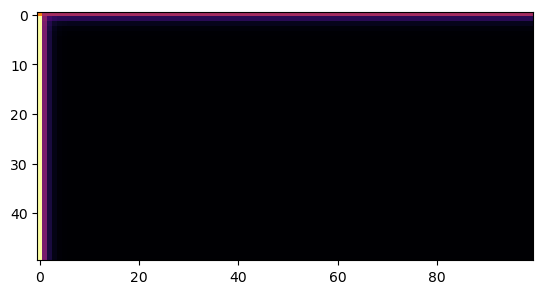

In [4]:
import numpy as np
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Función para analizar la evolución temporal de una placa con temperatura inicial temp_init a
# la que se le aplica una temperatura de temp_sup en el borde superior y una de temp_lat en el
# borde izquierdo. ancho y alto definien el tamaño de la grilla, omega es un parámetro del método
# utilizado y frames es la cantidad de imágenes que deseamos guardar del sistema
def temperaturas(temp_sup, temp_lat, temp_init, ancho, alto, omega, frames):

    phi = np.zeros((ancho + 1, alto + 1), dtype=float) # Grilla bidimensional

    phi[:, :] = temp_init # Condición inicial en el interior del sistema

    phi[0, :] = temp_sup # Condición inical en borde superior de grilla

    phi[:, 0] = temp_lat # Condición inical en borde izquierdo de grilla

    phi[0, 0] = (temp_sup + temp_lat) / 2 # Condición inicial en la esquina

    phi_copy = phi.copy() # Para comparar el error con la nueva grilla

    animation = np.zeros((frames, ancho, alto))# Para almacenar copias del sistema para animar

    iterations = 0 # Contador para las iteraciones

    iterations_per_frame = 20 # Cada cuantas iteraciones se desea guarda una copia del sistema
    frame_counter = 0 # Contador para los fotogramas guardados

    delta = 1 # Tolerancia de precisión

    while delta > 1e-7:
        # Método Gauss Seidel para aproximar el cambio de T en el espacio con el tiempo
        for i in range(1, ancho):

            for j in range(1, alto):

                phi[i,j] = (1 + omega) * 0.25 * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) - omega * phi[i, j]

        # Se guarda una copia del estado del sistema para crear la animación
        if frame_counter < frames:
            if (iterations % iterations_per_frame) == 0:

                animation[frame_counter, :, :] = phi[:-1, :-1]

                frame_counter += 1


        delta = np.max(np.abs(phi - phi_copy))

        iterations += 1

        phi_copy = phi.copy() # Ponemos la nueva grilla como la antigua para compararla
                              # con la  nueva en la siguiente iteración

    #print(iterations)  # Este print se debe habilitar para conocer la cantida de iteraciones
                        # para ajustar la animación dependiendo de las condiciones iniciales

    return animation



total_frames = 50 # Cantidad de fotogramas que se desea que muestre la animación

# Implementación de la animación

# Se guardan los resultados de la función iterativa
heatmap = temperaturas(100, 200, 20, 50, 100, 0, total_frames)

fig, ax = plt.subplots()

# Se crea el fotograma inicial, aquí se escoge el esquema de colores con cmap
animation = ax.imshow(heatmap[0,:,:], cmap="inferno")

# Se crea la función que va pasando los fotogramas
def animate(frame):
    new_frame = heatmap[frame,:,:]
    animation.set_data(new_frame)
    return animation


anim = FuncAnimation(fig, animate, frames=total_frames)
plt.show()